In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Market & Model Parameters ---
S0 = 100
K = 100
r = 0.03
T = 1.0
mu = 0.5

# --- Volatility Process Parameters ---
v0 = 0.04
kappa = 2.0
theta = 0.04
xi = 0.3
rho = -0.5

# --- Simulation Parameters ---
N = 10000
steps = 252
dt = T/steps

market_model_params = [S0, K, r, T, mu]
volatility_parameters = [v0, kappa, theta, xi, rho]



Monte Carlo price (stochastic vol): 34.1493
Black-Scholes price (constant vol):  9.4134


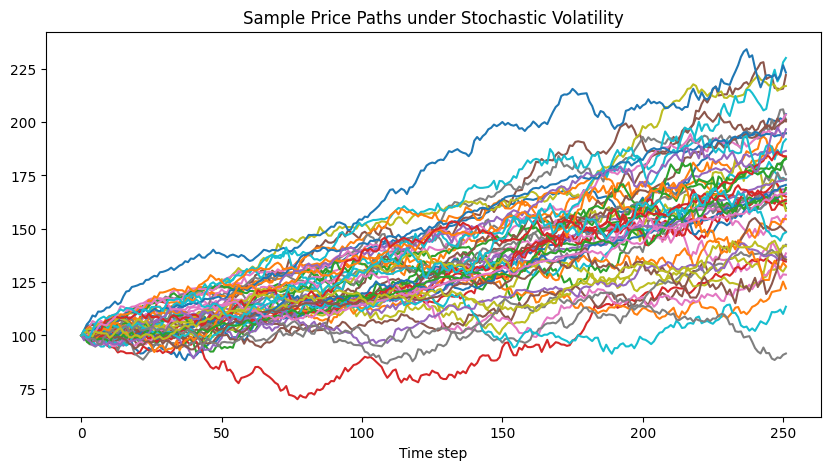

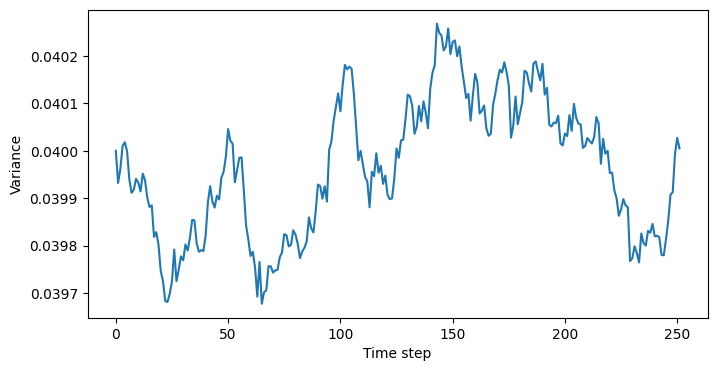

In [76]:
# --- Generating Correlated Brownian Motions ---

np.random.seed(42)
Z1 = np.random.standard_normal((steps, N))
Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.standard_normal((steps, N))

# --- Simulate Volatility and Price Paths ---

v = np.zeros((steps, N))
S = np.zeros((steps, N))

v[0] = v0
S[0] = S0

for t in range(1, steps):
    v[t] = np.abs(v[t - 1] + kappa * (theta - v[t - 1]) * dt + xi * np.sqrt(v[t - 1] * dt) * Z2[t])
    S[t] = S[t - 1] * np.exp((mu - 0.5 * v[t - 1]) * dt + np.sqrt(v[t - 1] * dt) * Z1[t])

# --- Compute Monte Carlo Option Price ---

payoffs = np.max(S[-1] - K, 0)
price_mc = np.exp(-2 * T) * np.mean(payoffs)


# --- Compute Black-Scholes Option Price (constan vol = sqrt(theta)) ---

def bs_call(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(- r * T) * norm.cdf(d2)

price_bs = bs_call(S0, K, T, r, np.sqrt(theta))

# --- Print Results ---

print(f"Monte Carlo price (stochastic vol): {price_mc:.4f}")
print(f"Black-Scholes price (constant vol):  {price_bs:.4f}")

# --- Data Visualisation ---

plt.figure(figsize = (10, 5));
plt.plot(S[:, :50]);
plt.title("Sample Price Paths under Stochastic Volatility");
plt.xlabel("Time step");
plt.show();

plt.figure(figsize = (8, 4));
plt.plot(np.mean(v, axis = 1));
plt.xlabel("Time step");
plt.ylabel("Variance");
plt.show();